<div style="border:solid green 2px; padding: 20px">
    
<b>Привет!</b> Мы рады тебя видеть на территории код-ревьюеров 😎. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать дата-специалистом.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У нас с тобой 6 попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример из 3 проекта: 
    
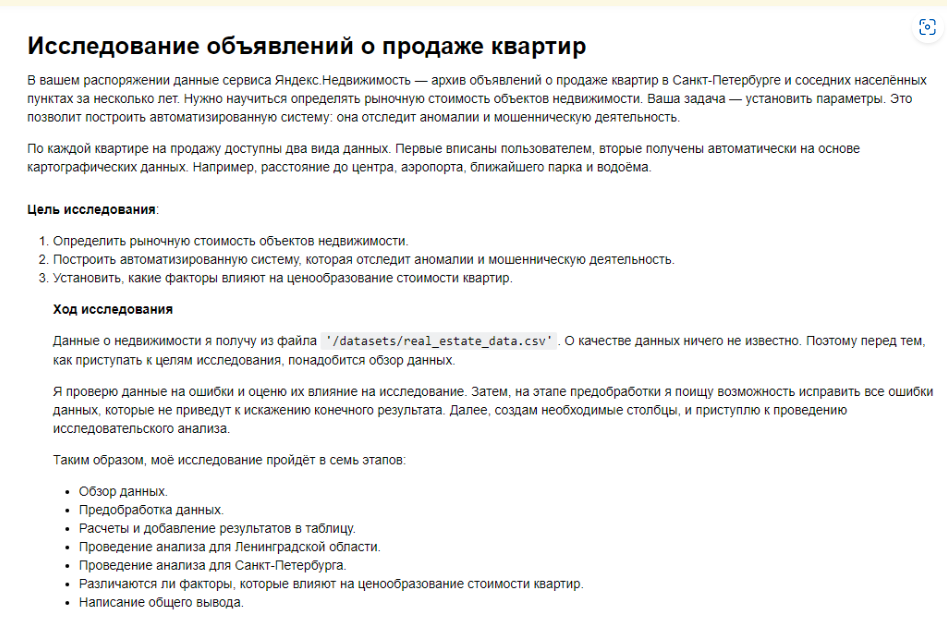
</div>

# Исследование данных пользователей сервиса аренды самокатов GoFast

***Цель исследования:***

Наша цель — понять, как пользователи с разными типами подписок влияют на выручку сервиса. Мы хотим проверить несколько гипотез и выяснить, какие метрики (расстояние, продолжительность поездок и выручка) различаются между пользователями с подпиской и без нее.

***Ход исследования:***

**1. Обзор данных**
- Загрузим данные о пользователях, поездках и подписках.
- Посмотрим на общую информацию, пропущенные значения и распределения.

**2. Предобработка данных**
- Преобразуем даты в удобный формат.
- Обработаем пропущенные значения, если они есть.
- Проверим наличие дубликатов и удалим их.

**3. Исследовательский анализ:**
- Опишем основные характеристики данных.
- Визуализируем распределения расстояний и продолжительности поездок.
- Сравним метрики между пользователями с разными типами подписок.

**4. Объединение данных**
- Объединение данных в одну таблтцу
- Создание отдельных таблиц для пользователей с подпиской и без.

**5. Подсчет выручки:**
- Рассчитаем общую выручку от пользователей с подпиской и без нее.

**6. Проверка гипотез:**
- Пользователи с подпиской проводят больше времени на поездках.
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 31303130 метров.
- Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Супер, старайся, пожалуйста, придерживаться этой стратегии в дальнейших проектах =)
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from math import factorial
from scipy.stats import binom
import seaborn as sns

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Хорошо. Модули выгружены

#### Шаг 1. Загрузка данных

In [ ]:
users = pd.read_csv('/data/users_go.csv')
rides = pd.read_csv('/data/rides_go.csv')
subscriptions = pd.read_csv('/data/subscriptions_go.csv')

In [3]:
display(users.head())
users.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
display(subscriptions)
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Данные разделены на три таблицы. В таблице “Пользователи” (users_go) содержится информация о пользователях, включая их имена, возраст и города проживания. Таблица “Подписки” (subscriptions_go) содержит данные о типах подписок и их стоимости. В таблице “Поездки” (rides_go) хранится информация о поездках пользователей.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Хорошо бы как нибудь прокомментировать полученные данные в разделе
</div>

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №2__
    
Отлично! Первый взгляд на данные есть

#### Шаг 2. Предобработка данных

##### Работа с датами

Для удобства работы переведем данные с датами в формат datetime, а также, добавим дополнительный столбец с номером месяца поездок.

In [6]:
# Преобразование к типу datetime
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [7]:
# Добавление месяца в таблице rides по столбцу date
rides['month'] = rides['date'].dt.month
display(rides.head())

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [8]:
# Проверим период дат и на наличие аномалий 
rides['date'].describe()

/tmp/ipykernel_404/3985558552.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rides['date'].describe()


count                   18068
unique                    364
top       2021-12-22 00:00:00
freq                       72
first     2021-01-01 00:00:00
last      2021-12-30 00:00:00
Name: date, dtype: object

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Хорошо бы проверить за какой период у нас данные. Проверить столбец длительности на предмет наличия аномалий. Например, если у нас разные года то январь 2021 и январь 2022 будут под одной цифрой (1). 
</div>

##### Обработка пропусков

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [10]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В данных всех трех таблиц не обнаружено пустых значений.

##### Обработка дубликатов

In [12]:
# Поиск дублирующиеся user_id в users
duplicate_user_ids = users[users.duplicated(subset='user_id', keep=False)]['user_id'].unique()
print("Дублирующиеся user_id:")
print(duplicate_user_ids)

Дублирующиеся user_id:
[  16   43   47   72  108  121  127  136  153  204  209  293  297  307
  403  422  611  635  659  666  737  807  809  829  908  909  924 1045
 1198 1237 1245]


In [13]:
# Удалить дубликаты в users
users = users.drop_duplicates(subset='user_id')

In [14]:
# Проверка дупликатов
duplicate_user_ids = users[users.duplicated(subset='user_id', keep=False)]['user_id'].unique()
print("Дублирующиеся user_id:")
print(duplicate_user_ids)

Дублирующиеся user_id:
[]


В таблице пользователей обнаружены дублирующиеся значения. Для улучшения качества данных и предотвращения некорректных аналитических выводов дублирующиеся значения были удалены.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__
    
Этот раздел сделан хорошо. Проверены основные возможные проблемы в данных.

#### Шаг 3. Исследовательский анализ данных

##### Исследование пользователей по городам

In [15]:
city_counts = users['city'].value_counts()
city_counts

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

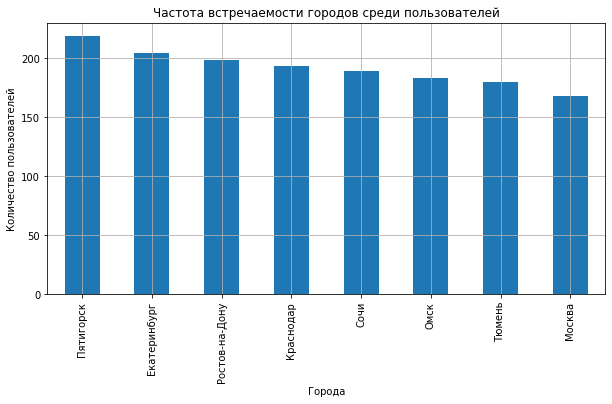

In [16]:
plt.figure(figsize=(10, 5))
city_counts.plot(
    kind='bar',
    title='Частота встречаемости городов среди пользователей',
    xlabel='Города',
    ylabel='Количество пользователей',
    grid=True
)
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный и наглядный график 👍
    
Здорово, когда он подписан. Так быстрее понять о чем идёт речь на нём.
    
</div>

Наибольшее количество пользователей из Пятигорска (219), наименьшее – из Москвы (168). Значения частоты встречаемости городов довольно близки друг к другу, варьируясь от 168 до 219. Это указывает на относительно равномерное распределение пользователей по городам. Различия между городами незначительны, что может свидетельствовать о равномерной популярности сервиса в различных регионах.

##### Исследование пользователей с подпиской и без.

In [17]:
subs_counts = users['subscription_type'].value_counts()
subs_counts

free     835
ultra    699
Name: subscription_type, dtype: int64

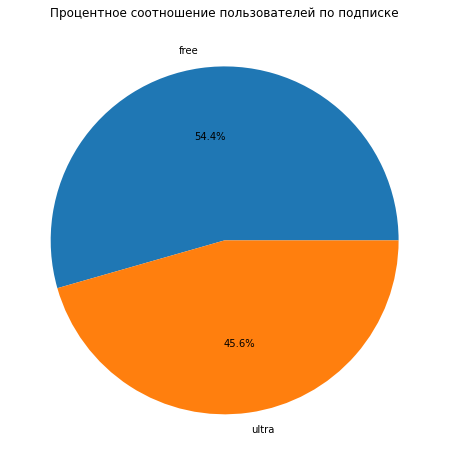

In [18]:
percentages = subs_counts / subs_counts.sum() * 100
plt.figure(figsize=(8, 8))
pie_chart = plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Процентное соотношение пользователей по подписке')
plt.show()

Подписка "free" является более популярной среди пользователей, с 54.4% от всех подписчиков.
Подписка "ultra" имеет меньше подписчиков, 45,6%.
Разница между количеством подписчиков в каждой категории незначительная, что указывает на сбалансированное распределение между бесплатными и платными подписками.

##### Возвраст пользователей

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Пользователей с подпиской немного меньше, тем не менее у компании-прокатчика есть неплохая база постоянных клиентов.

In [19]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

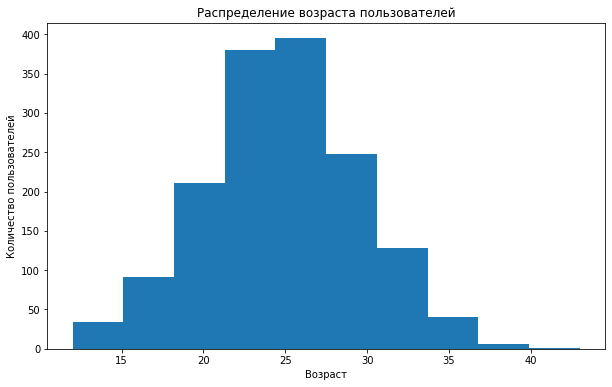

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(users['age'])
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Основная часть пользователей возрастом от 22 до 28 лет. Все что меньше 15 лет и больше 40 можно считать редкими значениями.

На гистограмме видно, что распределение возраста пользователей имеет нормальное распределение с пиком около среднего возраста (25 лет). Большинство пользователей находятся в возрасте от 20 до 30 лет. Значительно меньшее количество пользователей находится в крайних возрастных группах (до 20 и старше 30 лет).

##### Анализ поездок

In [21]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

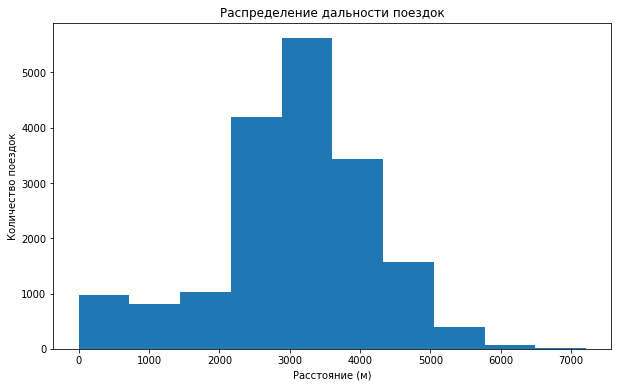

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(rides['distance'])
plt.title('Распределение дальности поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

Гистограмма показывает распределение дальности поездок среди пользователей. Большинство поездок имеют дальность в пределах от 2200 до 4200 метров, что указывает на наличие определенного диапазона, в котором совершается основная часть поездок.

Средняя дальность поездок составляет приблизительно 3071 метров расстояния, что свидетельствует о довольно продолжительных поездках. Стандартное отклонение в 1117 метров показывает значительный разброс данных вокруг среднего значения. Минимальное значение дальности поездок составляет около 0.86, а максимальное – около 7211 метров.

Распределение дальности поездок близко к нормальному, с небольшим смещением в сторону больших значений. Значительное количество поездок сосредоточено в районе среднего значения, что говорит о том, что большинство пользователей совершают поездки примерно одинаковой дальности. Наличие длинного хвоста на правой стороне распределения может указывать на присутствие выбросов – несколько поездок с значительно большей дальностью.

В целом, данные показывают, что большая часть поездок имеет умеренную дальность, с редкими выбросами на большие расстояния.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Основная часть поездок занимает от 2500 до 3800 метров. Медиана 3133 метра. Поездки на расстояние более 5 км редки. Однако на гистограмме видно, что некоторая часть пользователей использует самокаты для коротких поездок - до 1500 м.

In [23]:
# округление продолжительности поездок
rides['duration'] = np.ceil(rides['duration'])

rides['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отлично, что используешь именно np.ceil(). Грамотный шаг

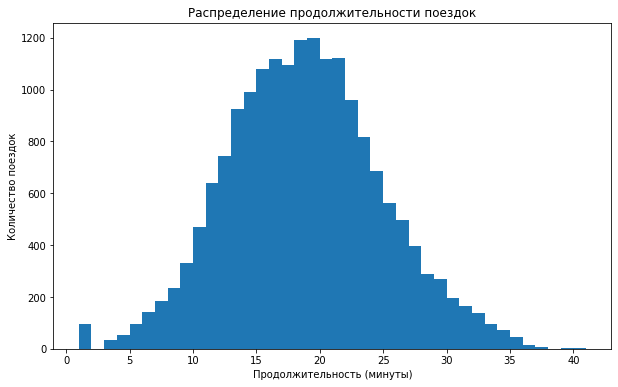

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(rides['duration'], bins=40)
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

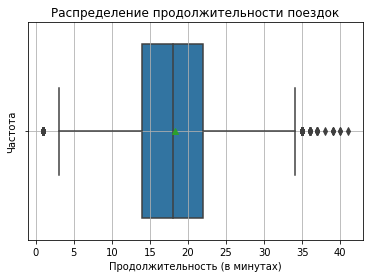

In [25]:
sns.boxplot(
    x = "duration",
    showmeans=True,  # Add a line to show the mean
    data=rides
)

plt.title("Распределение продолжительности поездок")
plt.xlabel("Продолжительность (в минутах)")
plt.ylabel("Частота")
plt.grid(True)
plt.show()

Гистограмма и диаграмма размаха предназначены для визуализации распределения продолжительности поездок.

Гистограмма показывает частотное распределение продолжительности поездок с пиком около 18-минутной отметки. Данные распределены примерно нормально, с некоторой асимметрией в сторону более коротких периодов.

Диаграмма размаха предоставляет сводную информацию о распределении:
- В рамке представлен интерквартильный диапазон (IQR), охватывающий от 25 до 75 процентилей.
- Линия внутри рамки указывает медиану (50-й процентиль), которая составляет 18 минут.
- Зеленый треугольник указывает среднюю продолжительность, которая также составляет примерно 18 минут.
- Усы простираются до наименьших и наибольших значений в пределах 1,5 IQR от нижнего и верхнего квартилей соответственно.
- Выбросы за пределами «усов» наносятся как отдельные точки, с несколькими заметными выбросами на конце с более высокой продолжительностью.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Хорошо бы графики подкрепить боксплотом

#### Шаг 4. Объединение данных

##### Создание объедененной таблицы и таблиц для пользователей с подпиской и без.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

 Отсутствует проверка размерности:
    
* размеры датасетов до объединения
* размер результирующего датафрейма (с учетом типа объединения)

In [26]:
# Создание объедененной таблицы с данными о пользователях
data = pd.merge(users, rides, on='user_id')
data = pd.merge(data, subscriptions, on='subscription_type')
display(data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [27]:
# Создание датафрейма с данными о пользователях без подписки
no_subscription = data[data['subscription_type'] == 'free']

# Создание датафрейма с данными о пользователях с подпиской
with_subscription = data[data['subscription_type'] == 'ultra']

display(no_subscription.head())
display(with_subscription.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отлично. Датасеты выведены корректно

Проверим размерности датафреймов до и после объединения.

In [28]:
print('Размер users:', users.shape)
print('Размер rides:', rides.shape)
print('Размер subscriptions:', subscriptions.shape)
print('Размер data:', data.shape)
print('Размер no_subscription:', no_subscription.shape)
print('Размер with_subscription:', with_subscription.shape)

Размер users: (1534, 5)
Размер rides: (18068, 5)
Размер subscriptions: (2, 4)
Размер data: (18068, 12)
Размер no_subscription: (11568, 12)
Размер with_subscription: (6500, 12)


Как видно, самая большая размерность до объеденения данных была у таблицы поездок: 18068 строк. При обединении данных к каждой поездки добавилась информация о пользователей из таблицы users и о подписки и стоимости поездки из таблицы subscription. Таким образом, объедененная таблица имеет одинаковое количество строк с таблицей rides, но получила дополнительное количество столбцов.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отлично. Проверка размерности датасетов проведена

##### Сравнение дальности поездок

In [29]:
# Сравнение описательной статистики по дальности поездок межнду пользователями с подпиской и без.
print('Пользователи без подписки')
print(no_subscription['distance'].describe())
print('\nПользователи с подпиской')
print(with_subscription['distance'].describe())

Пользователи без подписки
count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Пользователи с подпиской
count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


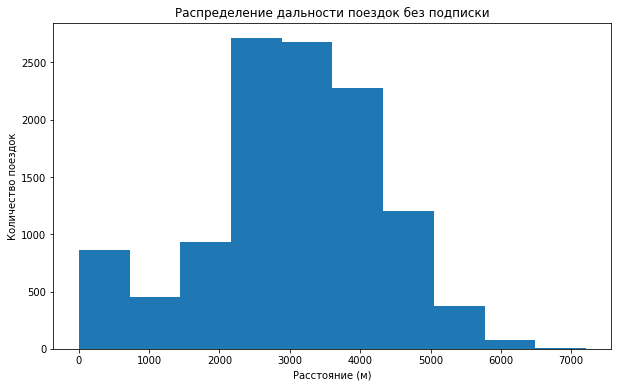

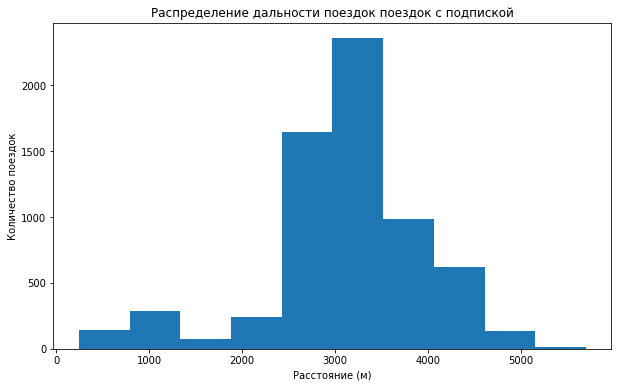

In [30]:
# Дальность поездок пользователей без подписки
plt.figure(figsize=(10, 6))
plt.hist(no_subscription['distance'])
plt.title('Распределение дальности поездок без подписки')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

# Дальность поездок пользователей с подпиской
plt.figure(figsize=(10, 6))
plt.hist(with_subscription['distance'])
plt.title('Распределение дальности поездок поездок с подпиской')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

Оба распределения показывают, что большинство поездок укладывается в диапазон от 2000 до 4000 метров. Оба распределения имеют правостороннее смещение, что указывает на наличие более коротких поездок по сравнению с длинными.

Пользователи без подписки имеют более широкий диапазон значений, что отражается в большем стандартном отклонении и максимальном значении. Пользователи с подпиской имеют более узкий диапазон значений, что может указывать на более стабильные и предсказуемые поездки.

##### Сравнение продолжительности поездок

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

У пользователей без подписки значительно больше коротких поездок - до 1 км и в целом максимальная дальность поездки выше, чем у платных пользователей.

In [31]:
# Сравнение описательной статистики по продолжительности поездок межнду пользователями с подпиской и без.
print('Пользователи без подписки')
print(no_subscription['duration'].describe())
print('\nПользователи с подпиской')
print(with_subscription['duration'].describe())

Пользователи без подписки
count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Пользователи с подпиской
count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64


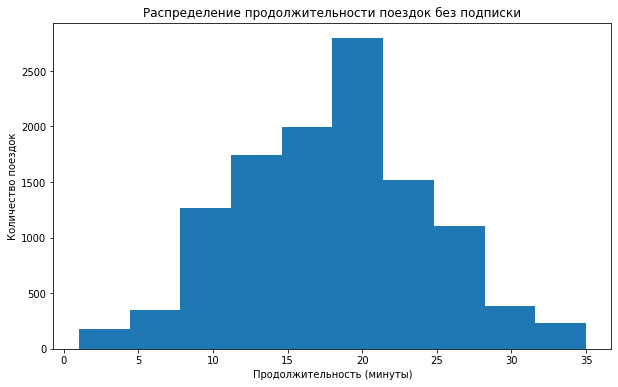

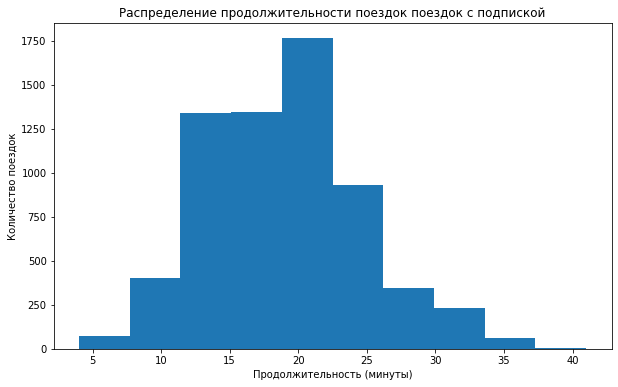

In [32]:
# Продолжительность поездок пользователей без подписки
plt.figure(figsize=(10, 6))
plt.hist(no_subscription['duration'])
plt.title('Распределение продолжительности поездок без подписки')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

# Продолжительность поездок пользователей с подпиской
plt.figure(figsize=(10, 6))
plt.hist(with_subscription['duration'])
plt.title('Распределение продолжительности поездок поездок с подпиской')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()

Оба распределения показывают, что большинство поездок укладывается в диапазон от 10 до 25 минут. Оба распределения имеют пик в районе 18-19 минут.
Пользователи с подпиской имеют немного более высокое среднее значение продолжительности поездок и меньший разброс значений, что отражается в меньшем стандартном отклонении. Это может указывать на более стабильные и предсказуемые поездки.

#### Шаг 5. Подсчёт выручки

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

В целом картина такая же - распределение внутри категорий имеют одинаковый профиль (и одинаковый с профилем распределения до разбивки на категории - строили на ранних этапах), но в каждом из диапазонов бесплатных пользователей чуть больше, но их, как мы помним, и в целом больше.

Краевые значения (минимум и максимум) у бесплатных пользователей смещены влево относительно платных подписчиков - стоимость минуты все-таки больше, значит часть пользователей торопится завершить поездки за меньший срок. Но при этом визуально среднее значение не сильно смещено

In [33]:
# агрегированные данные о поездках 
pivot_table = data.pivot_table(
    index=['user_id', 'month'],
    values=['name', 'distance', 'duration'],
    aggfunc={
        'name': 'count',
        'distance': 'sum',
        'duration': 'sum'
    }
).reset_index()
pivot_table.rename(columns={
    'name': 'trip_count',
    'distance': 'total_distance',
    'duration': 'total_duration'
}, inplace=True)
pivot_table.head()

,user_id,month,total_distance,total_duration,trip_count
0,1,1,7027.511294,42.0,2
1,1,4,754.159807,7.0,1
2,1,8,6723.470560,46.0,2
3,1,10,5809.911100,32.0,2
4,1,11,7003.499363,56.0,3


In [34]:
# Функция для расчета выручки
def calculate_revenue(row, data):
    user_data = data[data['user_id'] == row['user_id']]
    start_ride_price = user_data['start_ride_price'].values[0]
    minute_price = user_data['minute_price'].values[0]
    subscription_fee = user_data['subscription_fee'].values[0]
    
    return (row['trip_count'] * start_ride_price +
            row['total_duration'] * minute_price +
            subscription_fee)


# Применение функции для расчета выручки
pivot_table['total_revenue'] = pivot_table.apply(calculate_revenue, axis=1, data=data)

# Отображение первых строк обновленной сводной таблицы
display(pivot_table.head())

,user_id,month,total_distance,total_duration,trip_count,total_revenue
0,1,1,7027.511294,42.0,2,451.0
1,1,4,754.159807,7.0,1,241.0
2,1,8,6723.470560,46.0,2,475.0
3,1,10,5809.911100,32.0,2,391.0
4,1,11,7003.499363,56.0,3,535.0


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Молодец, что используешь собственные функции

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки? 

Для проверки гипотезы проведем t-test:
- Нулевая гипотеза (H0): Средняя продолжительность поездок пользователей с подпиской меньше или равна средней продолжительности поездок пользователей без подписки.
- Альтернативная гипотеза (H1): Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация нулевой и альтернативной гипотез
</div>

In [35]:
# Проведем t-тест для независимых выборок с правосторонней альтернативной гипотезой
t_stat, p_value = stats.ttest_ind(
    with_subscription['duration'],
    no_subscription['duration'],
    equal_var=False,
    alternative='greater'
)

# Вывод результатов
print(f"T-статистика: {round(t_stat, 3)}")
print(f"P-значение: {(p_value)}")

T-статистика: 12.625
P-значение: 1.1814679253701353e-36


In [36]:
# Проверка гипотезы
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Проверка гипотезы показала что, пользователи действительно тратят больше времени на поездки. Это означает, что пользователи с подпиской могут быть «выгоднее» для компании.


##### Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Для проверки гипотезы проведем t-test:
- Нулевая гипотеза (H0): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров или меньше.
- Альтернативная гипотеза (H1): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [37]:
optimal_distance = 3130

# Проведем t-тест для независимых выборок с правосторонней альтернативной гипотезой
t_stat, p_value = stats.ttest_1samp(
    with_subscription['distance'],
    optimal_distance,
    alternative='less'
)

# Вывод результатов
print(f"T-статистика: {round(t_stat, 3)}")
print(f"P-значение: {(p_value)}")

T-статистика: -1.402
P-значение: 0.08046311521502146


In [38]:
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

Не отвергаем нулевую гипотезу


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Смотри, поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно имеет смысл проверить одностороннюю гипотезу, что расстояние, которое проезжают пользователи с подпиской не превышает оптимального расстояния в 3130 м.

То есть в статистическом тесте стоит поставить параметр alternative = 'greater' и изменить Н1 на знак `больше`

Проверка гипотезы показала что, расстояние поездок пользователей с подпиской действительно не превышает оптимальное значение с точки зрения износа самоката. Это означает, что большие поездки на самокатах пользователями с подпиской не приведет к излишнему износу самокатов.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Для проверки гипотезы проведем t-test:

- Нулевая гипотеза (H0): Помесячная выручка от пользователей с подпиской меньше или равна выручке от пользователей без подписки.
- Альтернативная гипотеза (H1): Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [39]:
# Создаем словарь для сопоставления user_id с subscription_type
subscription_dict = with_subscription.set_index('user_id')['subscription_type'].to_dict()

# Используем map для добавления столбца subscription_type в pivot_table
pivot_table['subscription_type'] = pivot_table['user_id'].map(subscription_dict)

# Заполняем пропущенные значения в столбце subscription_type значением по умолчанию 'free'
pivot_table['subscription_type'] = pivot_table['subscription_type'].fillna('free')

# Разделим данные на две группы: с подпиской и без подписки
with_subscription_revenue = pivot_table[pivot_table['subscription_type'] != 'free']['total_revenue']
no_subscription_revenue = pivot_table[pivot_table['subscription_type'] == 'free']['total_revenue']

In [40]:
# Проверяем добавленные столбцы и объекты Series с выручкой
print("Размерность сводной таблицы с выручкой:", pivot_table.shape)
display(pivot_table.head())
print()
print("Количество строк в with_subscription_revenue:", len(with_subscription_revenue))
print("Количество строк в no_subscription_revenue:", len(no_subscription_revenue))

Размерность сводной таблицы с выручкой: (11331, 7)


,user_id,month,total_distance,total_duration,trip_count,total_revenue,subscription_type
0,1,1,7027.511294,42.0,2,451.0,ultra
1,1,4,754.159807,7.0,1,241.0,ultra
2,1,8,6723.470560,46.0,2,475.0,ultra
3,1,10,5809.911100,32.0,2,391.0,ultra
4,1,11,7003.499363,56.0,3,535.0,ultra



Количество строк в with_subscription_revenue: 4533
Количество строк в no_subscription_revenue: 6798


In [44]:
# Выполним t-тест с указанием параметра alternative
t_stat, p_value = stats.ttest_ind(with_subscription_revenue, no_subscription_revenue, alternative='greater')

# Вывод результатов
print(f"T-статистика: {round(t_stat, 3)}")
print(f"P-значение: {(p_value)}")
if p_value < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

T-статистика: 11.642
P-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Проверка гипотезы показала что, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Пользователи с подпиской действительно приносят компании больше прибыли по сравнению с пользователями без подписки.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Методологически проверка гипотез проведена верно и наглядный вывод результатов

##### Метод проверки гипотезы - снизилось ли количество обращений в техподдержку после обновлении сервера?

Для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления серверов, понадобится парный t-тест (тест о равенстве средних для зависимых (парных) выборок). Этот тест используется для сравнения средних значений двух связанных выборок, например, данных до и после обновления для одних и тех же пользователей.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Для решения потребуется тест на равенство средних для зависимых выборок, до и после изменений.>

#### Шаг 7. Распределения

##### Какое минимальное количество промокодов нужно разослать клиентам, чтобы вероятность того, что минимум 100 человек продлят подписку, была примерно 5%. 

Минимальное количество промокодов, которое нужно разослать: 1161


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


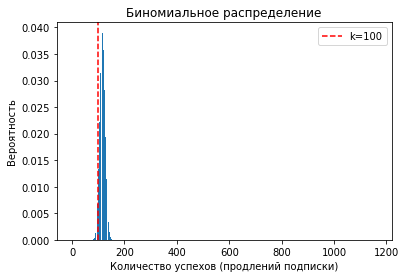

In [42]:
# Заданные параметры
p = 0.1
n = 100
target_probability = 1 - 0.05

# Расчёт биномиального распределения
distr = []

for i in range(0, n + 1):
    choose = factorial(n) / (factorial(i) * factorial(n - i))
    prob = choose * p**i * (1 - p)**(i - n)
    distr.append(prob)

# Поиск минимального N
N = n
while True:
    cdf_value = binom.cdf(n-1, N, p)
    if 1 - cdf_value >= target_probability:
        print(f"Минимальное количество промокодов, которое нужно разослать: {N}")
        break
    N += 1

# Построение графика распределения
x = np.arange(0, N+1)
pmf_values = binom.pmf(x, N, p)

plt.bar(x, pmf_values)
plt.axvline(x=n, color='r', linestyle='--', label=f'k={n}')
plt.xlabel('Количество успехов (продлений подписки)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')
plt.legend()
plt.show()

Кумулятивная функция биноминального распределения показала, чтобы вероятность не выполнить план была примерно на уровне 5%, нужно разослать минимум 1161 промокодов.

##### Какова вероятность, что из отправленных 1млн уведомлений менее 399,5 тыс. пользователей откроют уведомления?

Математическое ожидание (μ): 400000.0
Стандартное отклонение (σ): 489.89794855663564
Вероятность того, что уведомление откроют не более 399500 пользователей: 0.15371708296369768


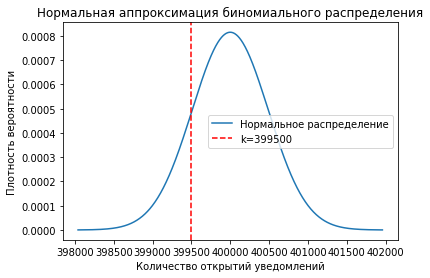

In [43]:
# Заданные параметры
n = 1000000  # количество уведомлений
p = 0.4  # вероятность открытия уведомления
target_k = 399500  # целевое значение

# Математическое ожидание и стандартное отклонение
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Задаем нормальное распределение
distr = stats.norm(mu, sigma)

# Вероятность того, что уведомление откроют не более target_k пользователей
result = distr.cdf(target_k)

print(f"Математическое ожидание (μ): {mu}")
print(f"Стандартное отклонение (σ): {sigma}")
print(f"Вероятность того, что уведомление откроют не более {target_k} пользователей: {result}")

# Построение графика нормального распределения
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = distr.pdf(x)

plt.plot(x, y, label='Нормальное распределение')
plt.axvline(x=target_k, color='r', linestyle='--', label=f'k={target_k}')
plt.xlabel('Количество открытий уведомлений')
plt.ylabel('Плотность вероятности')
plt.title('Нормальная аппроксимация биномиального распределения')
plt.legend()
plt.show()

Кумулятивная функция нормальной аппроксимации биномиального распределения показала, что вероятность открытия push-уведомлений менее 399,5 тыс. пользователями составляет 15,37%.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Корректная реализация, молодец

#### Общий вывод

В ходе исследования данных о пользователях сервиса аренды самокатов из нескольких городов, а также об их поездках, были выполнены следующие этапы:

**1. Открытие файла и начальная оценка данных**

На этом этапе была проведена предварительная оценка структуры и содержания данных, определены основные параметры и их типы.

**2. Предобработка данных**

В рамках предобработки данных были выполнены следующие шаги:
- Работа с датамы - столбец с датами приведен в формат даты, а также, для удобства выделен столбец месяцев
- Проверены пропущенные значений
- Удалены дубликаты в таблице users.

**3. Исследовательский анализ данных**

В рамках исследовательского анализа были изучены и сделаны предварительные выводы следующих значений:
- частота встречаемости городов - Значения частоты встречаемости городов довольно близки друг к другу, варьируясь от 168 до 219. Это указывает на относительно равномерное распределение пользователей по городам. Различия между городами незначительны, что может свидетельствовать о равномерной популярности сервиса в различных регионах.
- соотношение пользователей с подпиской и без подписки - Подписка "free" является более популярной среди пользователей, с 835 подписчиками. Подписка "ultra" имеет меньше подписчиков, всего 699. Разница между количеством подписчиков в каждой категории незначительная, что указывает на сбалансированное распределение между бесплатными и платными подписками.
- возраст пользователей - Большинство пользователей находятся в возрасте от 20 до 30 лет. Значительно меньшее количество пользователей находится в крайних возрастных группах (до 20 и старше 30 лет).
- расстояние, которое пользователь преодолел за одну поездку - Распределение дальности поездок близко к нормальному, с небольшим смещением в сторону больших значений. Значительное количество поездок сосредоточено в районе среднего значения, что говорит о том, что большинство пользователей совершают поездки примерно одинаковой дальности. Наличие длинного хвоста на правой стороне распределения может указывать на присутствие выбросов – несколько поездок с значительно большей дальностью.
- продолжительность поездок - Графики показали, что данные по прожолжительности поездок распределены примерно нормально, с некоторой асимметрией в сторону более коротких периодов. Пик распределени приходится примерно на 18-минутную отметку где и находится средняя продолжительность поездок (18.3)

**4. Объединение данных**

На этом этапе данные из трех таблиц были объеденены в одну таблицу, а также созданы отдельные таблицы для пользователей с подпиской и без. В дополнении были сравнены расстояние и длительность поездок между пользователями с подпиской и без. 

Сравнение расстояния поездок показало, что пользователи без подписки имеют более широкий диапазон значений, что отражается в большем стандартном отклонении и максимальном значении. Пользователи с подпиской имеют более узкий диапазон значений, что может указывать на более стабильные и предсказуемые поездки.

Пользователи с подпиской имеют немного более высокое среднее значение продолжительности поездок и меньший разброс значений, что отражается в меньшем стандартном отклонении. Это может указывать на более стабильные и предсказуемые поездки.

**5. Подсчёт выручки**

На этом этапе была создана сводная таблица с подсчитанной помесячной выручки сервиса.

**6. Проверка гипотез**

Были проверены следующие гипотезы:

- Тратят ли пользователи с подпиской больше времени на поездки?
Проверка гипотезы показала, что, пользователи действительно тратят больше времени на поездки. Это означает, что пользователи с подпиской могут быть «выгоднее» для компании.

- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
Проверка гипотезы показала, что, расстояние поездок пользователей с подпиской действительно не превышает оптимальное значение с точки зрения износа самоката. Это означает, что большие поездки на самокатах пользователями с подпиской не приведет к излишнему износу самокатов.

- Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
Проверка гипотезы показала, что, помесячная выручка от пользователей с подпиской по месяцам значительно выше, чем выручка от пользователей без подписки. Пользователи с подпиской действительно приносят компании больше прибыли по сравнению с пользователями без подписки.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Итоговый вывод завершает твое исследование. Представлены основные результаты полученные в ходе анализа, но не увидел каких либо рекомендаций по развитию аренды самокатов в разрезе твоего исследования. Добавь, пожалуйста

Не забудь подкорректировать вывод после исправлений
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Вводная часть

2) Соотношение категорий пользователей в процентах или в долях от целого

3) Проверка  датафреймов до/после работы с ними

4) Округление

5) Гипотеза(3)

6) После каждого раздела / графика (или серии тестов) писать вывод по полученным данным с учетом поставленной бизнес задачи

7) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №2__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличный метариал по статистике. 
    
* Курс "Вероятность и статистика" | Глеб Михайлов (free): https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi
    
* Методы обнаружения выбросов: https://youtu.be/TOK7Kq7x0yc
    

</div>